<a href="https://colab.research.google.com/github/sandraliz/Covid-19-Analysis/blob/main/DAY_7_CSI_COVID_DATA_Analysis_Exponential_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files 



In [2]:
uploaded = files.upload()

Saving covid_19_india-nov.csv to covid_19_india-nov.csv


In [3]:
data1 = pd.read_csv('covid_19_india-nov.csv') 
data1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data1['Date'] = pd.to_datetime(data1['Date'],format='%d/%m/%y')

In [6]:

confirmed_total_date = pd.DataFrame(data1.groupby('Date')['Confirmed'].sum())
deceased_total_date = pd.DataFrame(data1.groupby('Date')['Deaths'].sum())

In [7]:
print(data1)

       Sno       Date     Time  ...   Cured Deaths Confirmed
0        1 2020-01-30  6:00 PM  ...       0      0         1
1        2 2020-01-31  6:00 PM  ...       0      0         1
2        3 2020-02-01  6:00 PM  ...       0      0         2
3        4 2020-02-02  6:00 PM  ...       0      0         3
4        5 2020-02-03  6:00 PM  ...       0      0         3
...    ...        ...      ...  ...     ...    ...       ...
8481  8482 2020-11-16  8:00 AM  ...  242084   1407    257876
8482  8483 2020-11-16  8:00 AM  ...   30555    364     31962
8483  8484 2020-11-16  8:00 AM  ...   62543   1107     68215
8484  8485 2020-11-16  8:00 AM  ...  480965   7372    511304
8485  8486 2020-11-16  8:00 AM  ...  394576   7661    431551

[8486 rows x 9 columns]


In [15]:
confirmed_total_date

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,2
2020-02-02,3
2020-02-03,3
...,...
2020-11-12,8683916
2020-11-13,8728795
2020-11-14,8773479


In [9]:
df = pd.DataFrame(confirmed_total_date)

In [10]:
df.shape

(292, 1)

In [11]:
x1 = list(np.arange(0,len(df),1))

In [12]:
y1 = list(df.iloc[:,0])

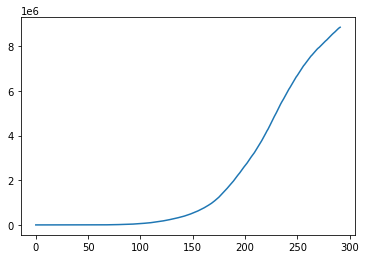

In [16]:
plt.plot(x1,y1)

In [17]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))


While the logistic model describes an infection growth that is going to stop in the future, the exponential model describes an unstoppable infection growth. For example, if a patient infects 2 patients per day, after 1 day we’ll have 2 infections, 4 after 2 days, 8 after 3 and so on. The most generic exponential function is:

f(x,a,b,c)=ae^b(x−c). 

Which can be interpreted as
N(t)=N(t0)e^g(t−t0) 

or

g=ln(N(t)/N(t0))t−t0 

N(t)  = the number of infected at time  t 
N(t0)  = the number of infected at time  t0 
g  = growth rate
t  = time (usually in days)


In [18]:
exp_fit = curve_fit(exponential_model,x1,y1,p0=[4000,0.02,10])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [19]:
infection_time, infection_rate, time = exp_fit[0]
print(infection_time, infection_rate, time)

29614.310041715966 0.015553399673094319 -87.79566834600764


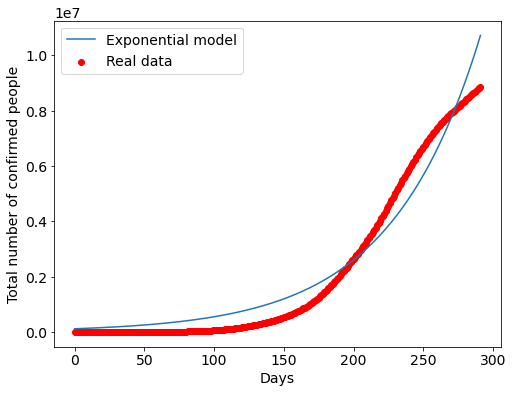

In [20]:
pred_x = list(range(max(x1),292))
plt.rcParams['figure.figsize'] = [8, 6]
plt.rc('font', size=14)
# Real data
plt.scatter(x1,y1,label="Real data",color="red")
# Predicted exponential curve
plt.plot(x1+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x1+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total number of confirmed people")
#plt.ylim((min(y1)*0.9,c*1.1))
plt.show()
